In [6]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))

print("project_dir: ", project_dir)
# Import the module
from utils.pipeline import Pipeline
from utils.dslabs_functions import NR_STDEV, get_variable_types, determine_outlier_thresholds_for_var

dataloader = Pipeline()


data, target = dataloader.get_econmical_classification_dataset_and_target()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
project_dir:  /Users/matsalexander/Desktop/kdd-process/src


## Standard Scaler

In [7]:
from pandas import read_csv, DataFrame, Series
from sklearn.preprocessing import StandardScaler

vars: list[str] = data.columns.to_list()
target_data: Series = data.pop(target)

transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(
    data
)
df_zscore = DataFrame(transf.transform(data), index=data.index)
df_zscore[target] = target_data
df_zscore.columns = vars

## MinMax Scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(data)
df_minmax = DataFrame(transf.transform(data), index=data.index)
df_minmax[target] = target_data
df_minmax.columns = vars

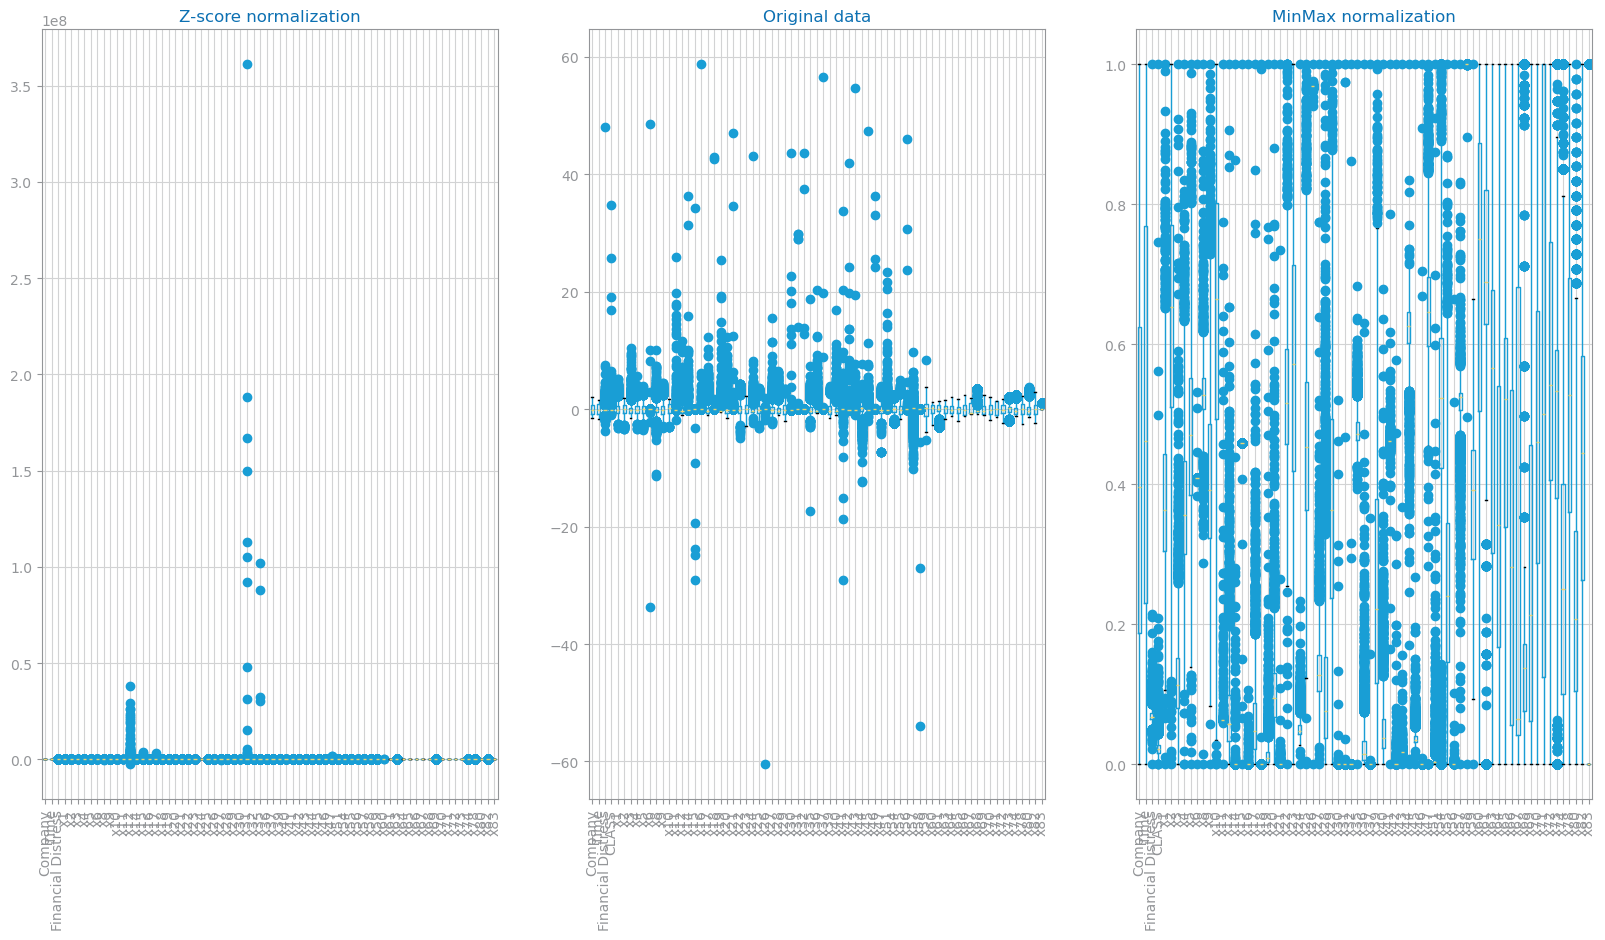

In [9]:
from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
data.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
df_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_minmax.boxplot(ax=axs[0, 2])
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
show()

# save image
IMAGE_FOLDER = "images_scaling"
Path(IMAGE_FOLDER).mkdir(exist_ok=True)
path = f"{IMAGE_FOLDER}/scaling_economical.png"
if not Path(path).exists():
    fig.savefig(path)

## Conclusion
We tested MinMax and Z-score scaling. StandardScaler chosen due to outlier handling and stable distribution. This approach improves model performance. All features now standardized.